<a href="https://colab.research.google.com/github/Jum-eng/DCIT-311-MACHINE-LEARNING-PROJECT/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING PROJECT-BREAST CANCER DETECTION**

# **B- Benign**
# **M-Malignant**

# **Import Libraries:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# **Data Loading:**

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Shape of Dataset:**

In [3]:
df.shape

(569, 32)

# **Column Datatype and Information:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Data Cleaning:**

In [5]:
df.drop(columns=['id'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print(df.dropna(inplace=True))

None


## Statistics of Numerical Features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# **Checking Null Values in the dataset**

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# **Checking Duplicated Records**

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

# **Visualization of data:**

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
print(df['diagnosis'].unique())




['M' 'B']


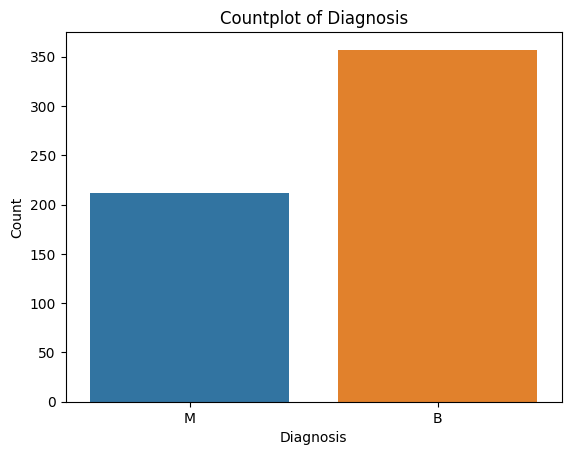

In [33]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Create countplot with custom colors
sns.countplot(data=df, x='diagnosis', palette=custom_palette)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Countplot of Diagnosis")
plt.show()


# **Box Plotting for all Numerical Values**

In [11]:
num_feature_list = [ f for f in df.columns if df.dtypes[f] == 'float64']
num_feature_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

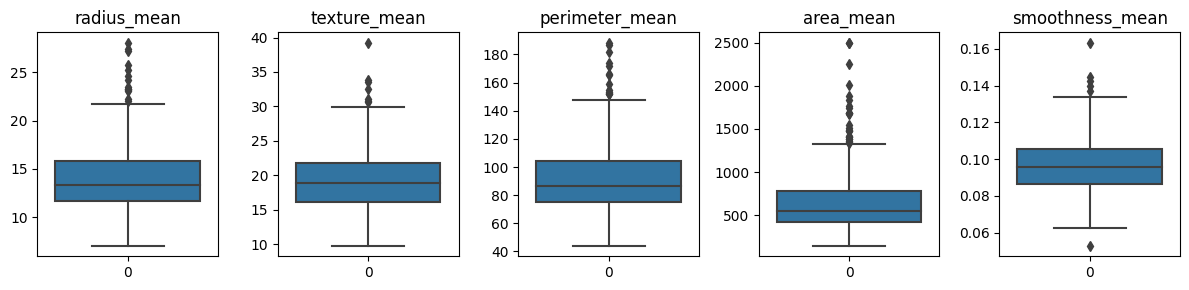

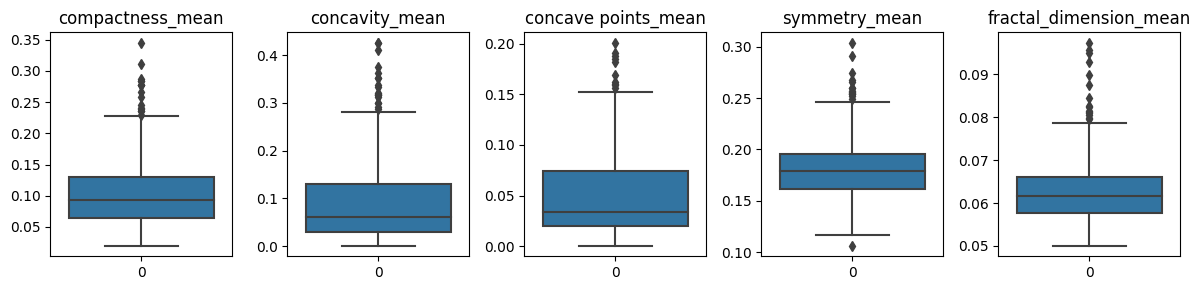

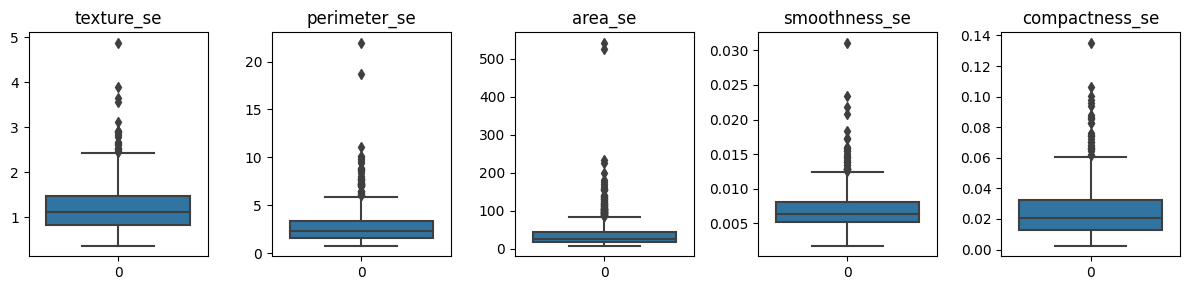

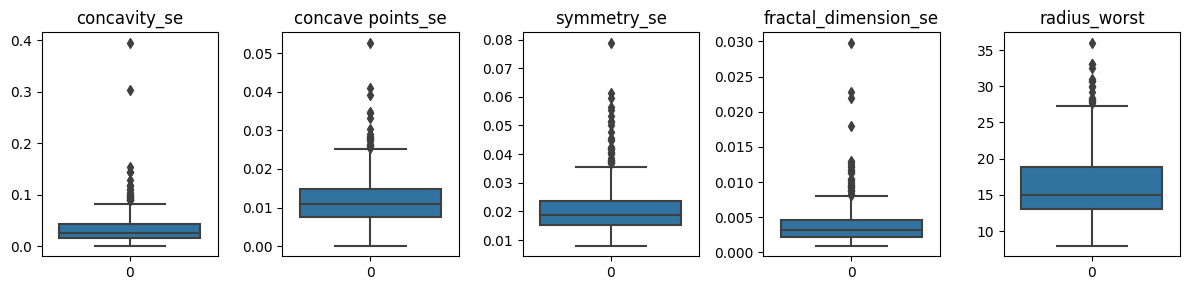

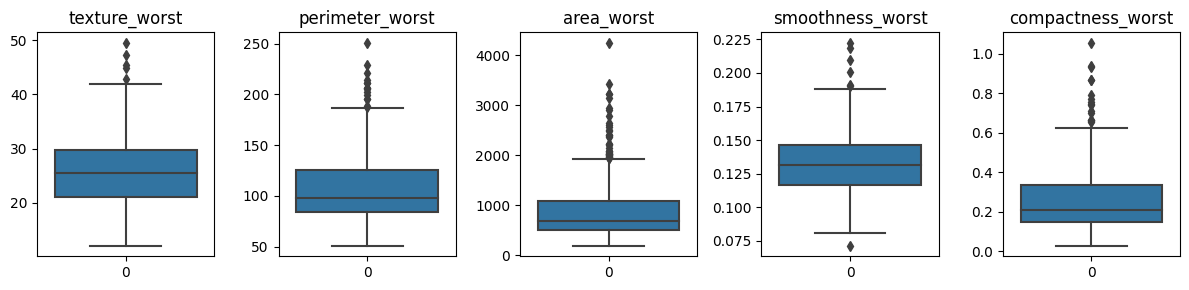

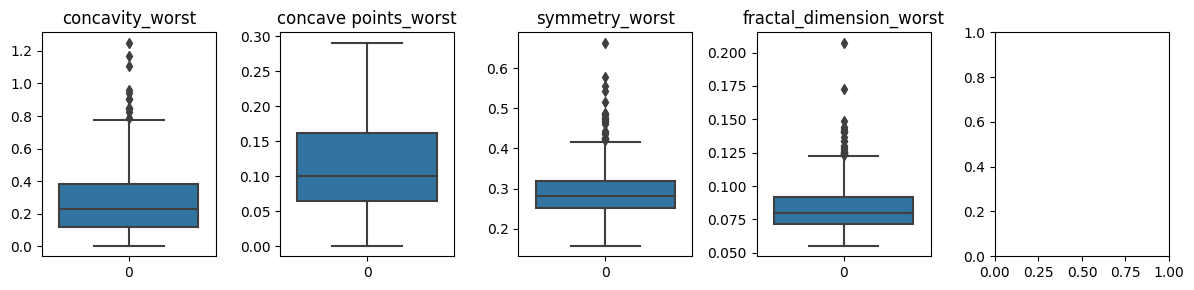

In [12]:
fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[:5], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[5:11], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[11:16], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[16:21], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[21:26], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[26:30], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

# **Detection and Capping of Outlier:**

In [13]:
p_05 = df['compactness_se'].quantile(0.05)
p_05

0.0078922

In [14]:
p_95 = df['compactness_se'].quantile(0.95)
p_95

0.06057800000000001

In [15]:
p_05 = df['compactness_se'].quantile(0.05) #5th quantile
p_95 = df['compactness_se'].quantile(0.95) #95th quantile

df['compactness_se'].clip(p_05, p_95, inplace=True)


<Axes: >

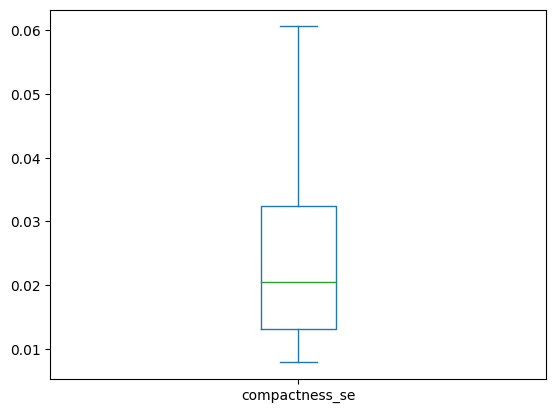

In [16]:
df['compactness_se'].plot(kind = 'box')

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[num_col] = df[num_col].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))


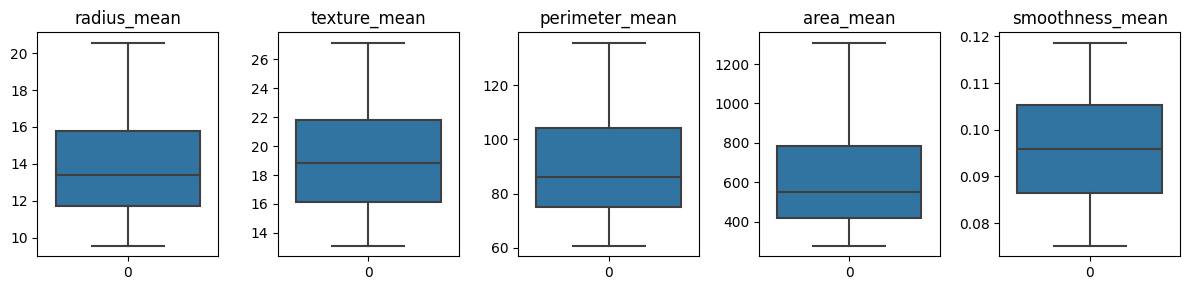

In [37]:
fig, axes = plt.subplots(ncols = 5 , figsize = (12,3))
for column, axis in zip(num_feature_list[:5], axes):
  sns.boxplot(data = df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

# **Checking for variance**

In [42]:
# Grouping by 'diagnosis' and calculating the mean of numeric columns
Df = df.groupby('diagnosis').mean().T
print(Df)



diagnosis                         B            M
radius_mean               12.208732    17.165917
texture_mean              17.907243    21.426583
perimeter_mean            78.451284   113.099755
area_mean                466.262555   935.566604
smoothness_mean            0.092533     0.102105
compactness_mean           0.080425     0.140223
concavity_mean             0.045525     0.153044
concave points_mean        0.025997     0.084411
symmetry_mean              0.174329     0.191101
fractal_dimension_mean     0.062564     0.062601
radius_se                  0.285809     0.571692
texture_se                 1.192720     1.192478
perimeter_se               2.010310     4.038921
area_se                   21.284986    64.402783
smoothness_se              0.007044     0.006654
compactness_se             0.020890     0.030927
concavity_se               0.023774     0.040445
concave points_se          0.009812     0.014633
symmetry_se                0.020398     0.019457
fractal_dimension_se

In [47]:
Df['%Diff'] = round(abs(Df['B']- Df['M']) / ((Df['B'] + Df['M'])/2) *100 , 2)
Df.head()

diagnosis,B,M,%Diff
radius_mean,12.208732,17.165917,33.75
texture_mean,17.907243,21.426583,17.89
perimeter_mean,78.451284,113.099755,36.18
area_mean,466.262555,935.566604,66.96
smoothness_mean,0.092533,0.102105,9.84


In [48]:
Df.sort_values(by = '%Diff' , ascending = False)
Df.head()

diagnosis,B,M,%Diff
radius_mean,12.208732,17.165917,33.75
texture_mean,17.907243,21.426583,17.89
perimeter_mean,78.451284,113.099755,36.18
area_mean,466.262555,935.566604,66.96
smoothness_mean,0.092533,0.102105,9.84


# **Cheching Correlation**

# **Correlation among independent values**

# **Independent Values**

In [50]:
independent_var = df.drop(['diagnosis'], axis = 1)
independent_var.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.0928,122.80,1001.00,0.118400,0.20870,0.242492,0.125644,0.230552,0.076066,...,25.38,17.33,171.424,2009.36,0.162200,0.563832,0.681828,0.236392,0.405896,0.118900
1,20.57,17.7700,132.90,1309.08,0.084740,0.07864,0.086900,0.070170,0.181200,0.056670,...,24.99,23.41,158.800,1956.00,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.69,21.2500,130.00,1203.00,0.109600,0.15990,0.197400,0.125644,0.206900,0.059990,...,23.57,25.53,152.500,1709.00,0.144400,0.424500,0.450400,0.236392,0.361300,0.087580
3,11.42,20.3800,77.58,386.10,0.118708,0.20870,0.241400,0.105200,0.230552,0.076066,...,14.91,26.50,98.870,567.70,0.171504,0.563832,0.681828,0.236392,0.405896,0.119352
4,20.29,14.3400,135.10,1297.00,0.100300,0.13280,0.198000,0.104300,0.180900,0.058830,...,22.54,16.67,152.200,1575.00,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


# **Correlation**

In [51]:
corr_matrix = independent_var.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.350139,0.997962,0.994277,0.172258,0.507785,0.678630,0.808566,0.149808,-0.304702,...,0.974125,0.315985,0.968960,0.959509,0.144936,0.460583,0.572343,0.745308,0.202060,0.042263
texture_mean,0.350139,1.000000,0.357376,0.356138,0.009986,0.261805,0.342793,0.322099,0.101528,-0.055611,...,0.371119,0.908420,0.381518,0.369722,0.094419,0.289577,0.331213,0.319283,0.122386,0.122380
perimeter_mean,0.997962,0.357376,1.000000,0.992132,0.206281,0.553863,0.714587,0.836231,0.180651,-0.258384,...,0.975575,0.323906,0.975128,0.960673,0.174659,0.502419,0.607749,0.773480,0.225514,0.086984
area_mean,0.994277,0.356138,0.992132,1.000000,0.176351,0.506282,0.686609,0.812946,0.158117,-0.287871,...,0.974734,0.317466,0.969038,0.971588,0.152360,0.449509,0.569012,0.738700,0.195430,0.043893
smoothness_mean,0.172258,0.009986,0.206281,0.176351,1.000000,0.659514,0.530491,0.563275,0.548167,0.585014,...,0.232915,0.057557,0.255099,0.233761,0.802573,0.479961,0.448214,0.511834,0.407003,0.505507
compactness_mean,0.507785,0.261805,0.553863,0.506282,0.659514,1.000000,0.893521,0.835698,0.586643,0.551300,...,0.552710,0.253494,0.600419,0.544178,0.562902,0.885101,0.838722,0.822685,0.494502,0.711453
concavity_mean,0.678630,0.342793,0.714587,0.686609,0.530491,0.893521,1.000000,0.930953,0.489048,0.321514,...,0.711529,0.328482,0.746643,0.710028,0.473177,0.803930,0.910013,0.887415,0.424289,0.557043
concave points_mean,0.808566,0.322099,0.836231,0.812946,0.563275,0.835698,0.930953,1.000000,0.460798,0.172522,...,0.833803,0.309546,0.855776,0.827586,0.473088,0.712280,0.796087,0.921720,0.397041,0.411473
symmetry_mean,0.149808,0.101528,0.180651,0.158117,0.548167,0.586643,0.489048,0.460798,1.000000,0.473914,...,0.199212,0.115418,0.228647,0.200896,0.425880,0.478458,0.442999,0.427940,0.704097,0.456436
fractal_dimension_mean,-0.304702,-0.055611,-0.258384,-0.287871,0.585014,0.551300,0.321514,0.172522,0.473914,1.000000,...,-0.236107,-0.039150,-0.189743,-0.220419,0.499162,0.452102,0.324830,0.178049,0.324871,0.775020


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

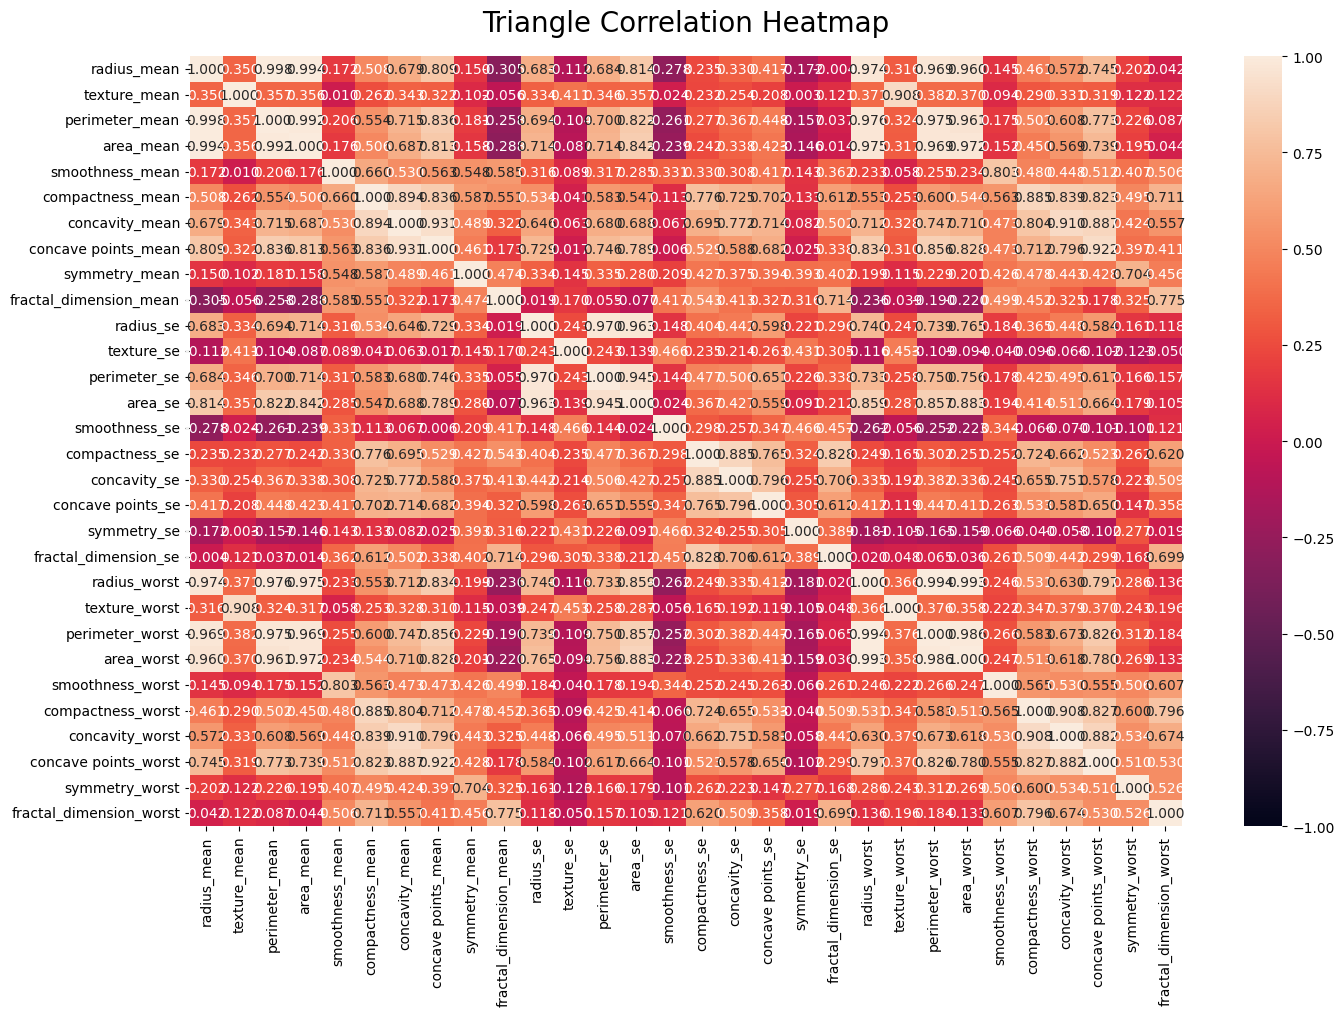

In [55]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt='.3f')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 20}, pad=18)

# **Upper Triangular Matrix**

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

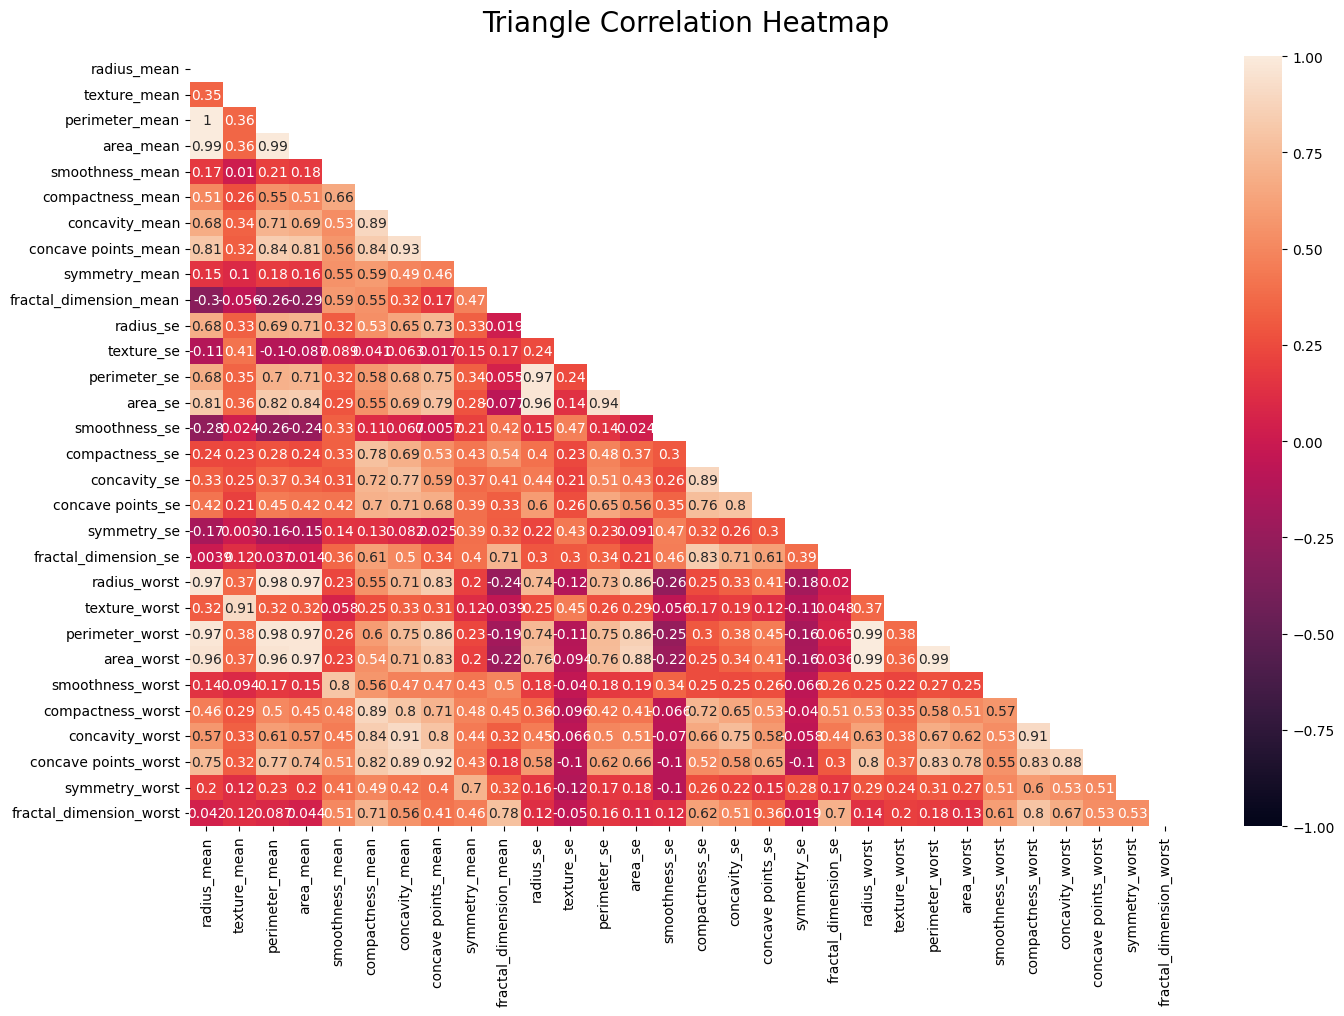

In [57]:
plt.figure(figsize=(16, 10))
#defining mask
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool_))
heatmap = sns.heatmap(corr_matrix, mask = mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 20}, pad=18)

# **Creating the Correlation matrix and Selecting the Upper triangular matrix**

In [60]:
cor_matrix = corr_matrix.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
upper_tri

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.350139,0.997962,0.994277,0.172258,0.507785,0.678630,0.808566,0.149808,0.304702,...,0.974125,0.315985,0.968960,0.959509,0.144936,0.460583,0.572343,0.745308,0.202060,0.042263
texture_mean,NaN,NaN,0.357376,0.356138,0.009986,0.261805,0.342793,0.322099,0.101528,0.055611,...,0.371119,0.908420,0.381518,0.369722,0.094419,0.289577,0.331213,0.319283,0.122386,0.122380
perimeter_mean,NaN,NaN,NaN,0.992132,0.206281,0.553863,0.714587,0.836231,0.180651,0.258384,...,0.975575,0.323906,0.975128,0.960673,0.174659,0.502419,0.607749,0.773480,0.225514,0.086984
area_mean,NaN,NaN,NaN,NaN,0.176351,0.506282,0.686609,0.812946,0.158117,0.287871,...,0.974734,0.317466,0.969038,0.971588,0.152360,0.449509,0.569012,0.738700,0.195430,0.043893
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659514,0.530491,0.563275,0.548167,0.585014,...,0.232915,0.057557,0.255099,0.233761,0.802573,0.479961,0.448214,0.511834,0.407003,0.505507
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.893521,0.835698,0.586643,0.551300,...,0.552710,0.253494,0.600419,0.544178,0.562902,0.885101,0.838722,0.822685,0.494502,0.711453
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930953,0.489048,0.321514,...,0.711529,0.328482,0.746643,0.710028,0.473177,0.803930,0.910013,0.887415,0.424289,0.557043
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460798,0.172522,...,0.833803,0.309546,0.855776,0.827586,0.473088,0.712280,0.796087,0.921720,0.397041,0.411473
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473914,...,0.199212,0.115418,0.228647,0.200896,0.425880,0.478458,0.442999,0.427940,0.704097,0.456436
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.236107,0.039150,0.189743,0.220419,0.499162,0.452102,0.324830,0.178049,0.324871,0.775020


# **Dropping features with highly correlated **

In [64]:
features_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(features_to_drop)



['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


# **New DataFrame**

In [65]:
independent_var1 = independent_var.drop(features_to_drop, axis = 1)
independent_var1.head(2)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.0928,0.11840,0.20870,0.242492,0.125644,0.230552,0.076066,0.957912,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.563832,0.681828,0.236392,0.405896,0.11890
1,20.57,17.7700,0.08474,0.07864,0.086900,0.070170,0.181200,0.056670,0.543500,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.186600,0.241600,0.186000,0.275000,0.08902


# **Discarding Columns with low variance**

In [67]:
from sklearn.feature_selection import VarianceThreshold

# Define the threshold value
threshold_n = 0.99

# Instantiate VarianceThreshold
sel = VarianceThreshold(threshold=(threshold_n * (1 - threshold_n)))

# Fit and transform the independent variables using VarianceThreshold
sel_var = sel.fit_transform(independent_var)

# Get the selected features using get_support(indices=True)
selected_features = independent_var.columns[sel.get_support(indices=True)]

# Subset the original independent_var DataFrame with selected features
independent_var_subset = independent_var[selected_features]


# **Converting Target Variables into Numerical**
.diagnosis : M = 1
.diagnosis: B = 0
.

In [69]:
Target_var = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Target_var.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# **Variables X and y**

In [73]:
X = independent_var1
y = Target_var

# **Feature Scaling**

In [74]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [76]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[ 1.23938183, -1.57324715,  1.79604996, ...,  1.96767986,
         2.33742155,  2.31486012],
       [ 2.05213196, -0.37201256, -0.91487282, ...,  1.15572403,
        -0.26212729,  0.37080042],
       [ 1.77491486,  0.5217479 ,  1.08731198, ...,  1.96767986,
         1.45176057,  0.2771108 ],
       ...,
       [ 0.80150483,  2.03703143, -0.93017512, ...,  0.44353861,
        -1.3186607 , -0.333173  ],
       [ 2.05326603,  2.03703143,  1.74772691, ...,  1.96767986,
         2.33742155,  2.34426825],
       [-1.42117145,  1.36671109, -1.69245503, ..., -1.44533826,
        -0.02182551, -0.84130908]])

# **Splitting Data into train and test set**

In [78]:
from sklearn.model_selection import train_test_split

# Assuming X_scaled is your feature matrix and y is your target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Model Building**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# **Evaluation Natrix**

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# **1.Logistic regression Model**

In [85]:
print("........Logistic regression..........")
from sklearn.linear_model import LogisticRegression
Lr_model = LogisticRegression()
Lr_model.fit(X_train, y_train)
y_pred_Lr = Lr_model.predict(X_test)
print(classification_report(y_test, y_pred_Lr))


........Logistic regression..........
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [86]:
print("........Decision Tree..........")
from sklearn.tree import DecisionTreeClassifier
Dt_model = DecisionTreeClassifier()
Dt_model.fit(X_train, y_train)
y_pred_Dt = Dt_model.predict(X_test)
print(classification_report(y_test, y_pred_Dt))

........Decision Tree..........
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [90]:
print("........Random Forest Model..........")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

........Random Forest Model..........
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

